# ISLP - Chapter 2 - Exercise 10
### Author: pzuehlke

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Exercise 10 (a):__

In [2]:
housing = pd.read_csv("Boston.csv")
housing = housing.rename({"Unnamed: 0": "property"}, axis=1)
housing.set_index("property", inplace=True)
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
property,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


__Exercise 10 (b):__ There are $ 506 $ rows and $ 13 $ columns. Each row
represents a different census tract in the Boston metropolitan area. Here is a
description of the columns:

* `crim`: Per capita crime rate by town.
* `zn`: Proportion of residential land zoned for large lots.
* `indus`: Proportion of non-retail business acres.
* `chas`: Charles River dummy variable ($ 1 $ if tract bounds river; $ 0 $ otherwise).
* `nox`: Nitric oxides concentration.
* `rm`: Average number of rooms per dwelling.
* `age`: Proportion of owner-occupied units built prior to 1940.
* `dis`: Weighted distances to five Boston employment centers.
* `rad`: Index of accessibility to radial highways.
* `tax`: Full-value property-tax rate per $ \$10,000 $.
* `ptratio`: Pupil-teacher ratio by town.
* `lstat`: $ \% $ lower status of the population.
* `medv`: Median value of owner-occupied homes in $ \$1,000 $'s.

__Exercise 10 (c):__ 

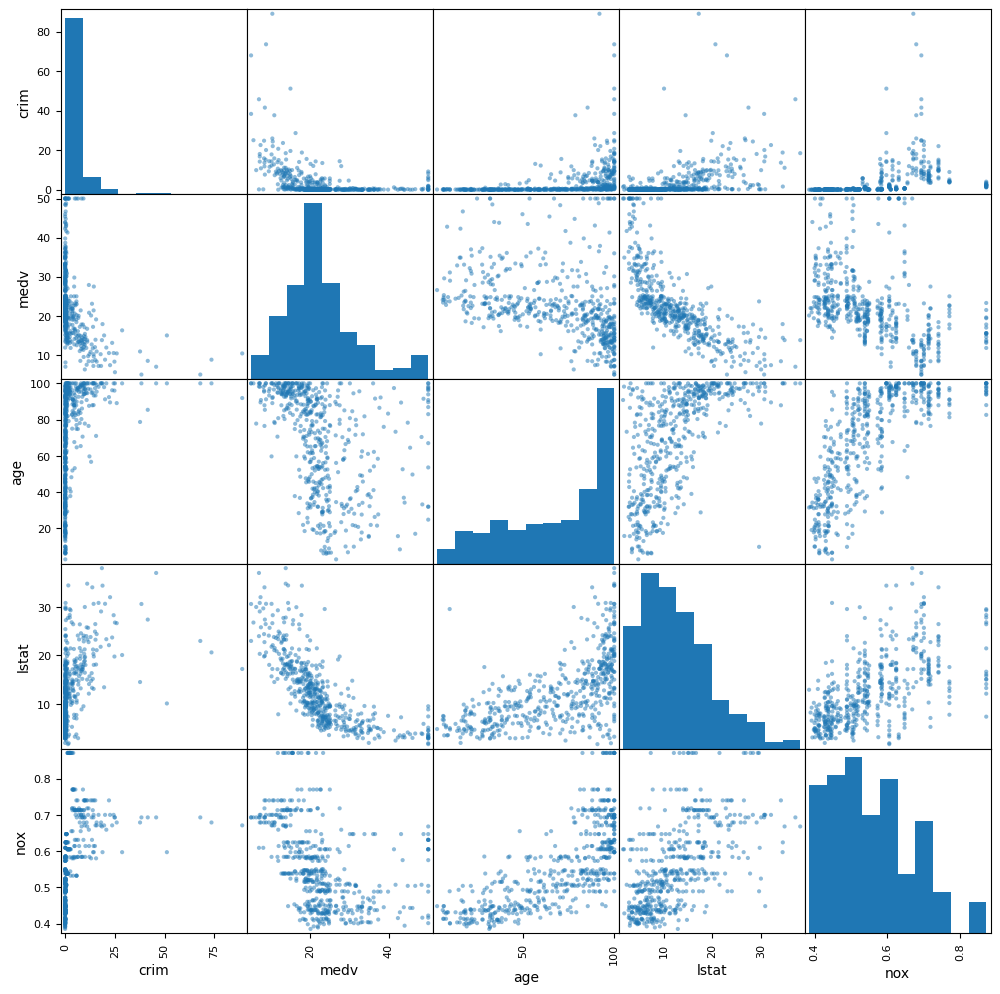

In [3]:
vars = ["crim", "medv", "age", "lstat", "nox"]
pd.plotting.scatter_matrix(housing[vars], figsize=(12, 12));

__10 (d):__ We will construct the scatterplots of the remaining variables against `crim` and then compute the correlations between `crim` and these variables.

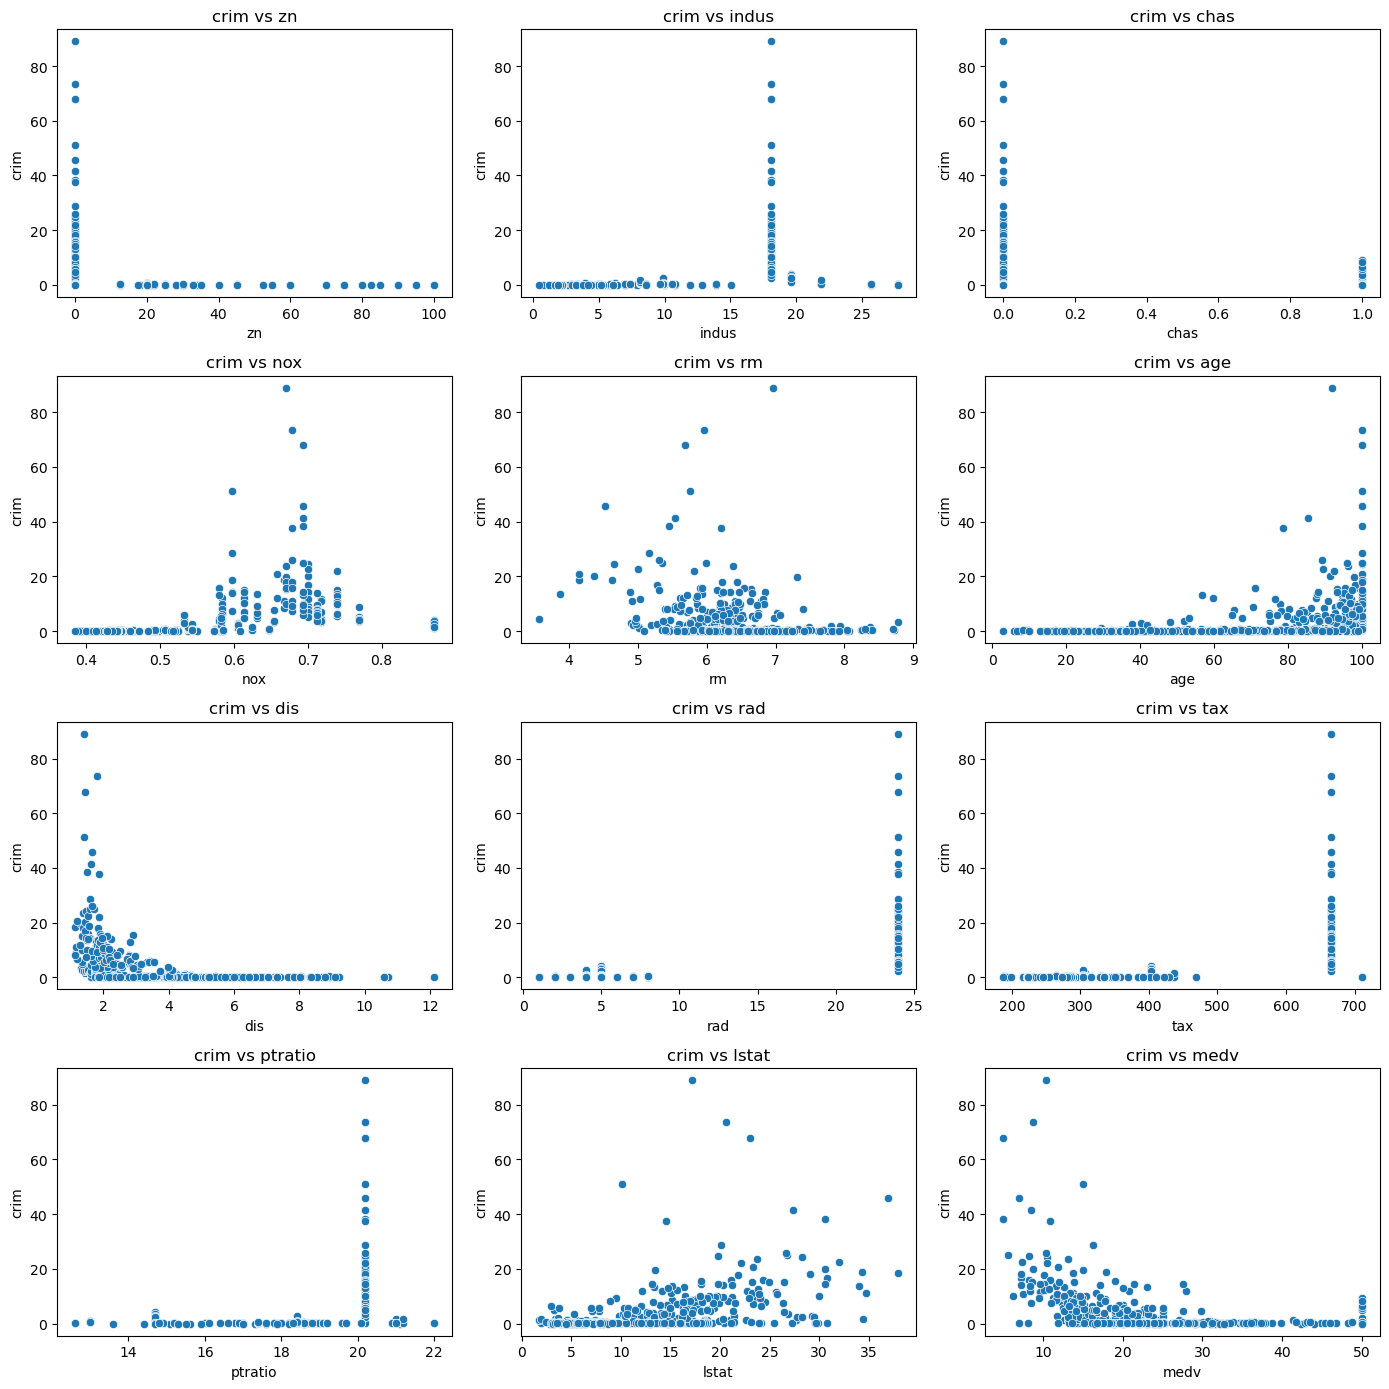

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
axes = axes.ravel()  # Flatten the array of axes

# Get all columns except `crim`:
predictors = [col for col in housing.columns if col != "crim"]

# Create scatterplots:
for idx, predictor in enumerate(predictors):
    sns.scatterplot(data=housing, x=predictor, y="crim", ax=axes[idx])
    axes[idx].set_title(f'crim vs {predictor}')
    axes[idx].set_xlabel(predictor)
    axes[idx].set_ylabel('crim')

plt.tight_layout()
plt.show()

In [5]:
correlations = housing.corr()['crim'].sort_values(ascending=False)
print(correlations)

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


`crim` seems to be correlated to several of the other predictors.

- Strong positive correlations ($ r > 0.5 $):
    * `rad` (accessibility to highways): higher highway access associated with more crime
    * `tax` (property tax rate): higher tax rates associated with more crime

- Moderate positive correlations ($ 0.3 < r < 0.5 $):
    * `lstat` (lower status population %): more lower status population associated with more crime
    * `nox` (nitric oxide concentration): more pollution associated with more crime
    * `indus` (industrial area proportion): more industrial areas associated with more crime
    * `age` (older housing proportion): more older homes associated with more crime

- Moderate negative correlations ($ -0.5 < r < -0.3 $):
    * `dis` (distance to employment): Greater distance to employment associated with less crime
    * `medv` (housing value): Higher home values associated with less crime

__10 (e):__ Among the highest crime rates, the range is $ 25.94 $ to $ 88.97 $. Among the top $ 10 $ highest tax rates, only two rates appear: $ 711 $ and $ 666 $. And among the $ 10 $ tracts having highest pupil-teacher ratio, this ratio ranges from $ 21.2 $ to $ 22.0 $. 
* $ 10 $ highest crime rates:

In [24]:
housing["crim"].nlargest(10)

property
381    88.9762
419    73.5341
406    67.9208
411    51.1358
415    45.7461
405    41.5292
399    38.3518
428    37.6619
414    28.6558
418    25.9406
Name: crim, dtype: float64

* $ 10 $ highest tax rates:

In [19]:
housing["tax"].nlargest(10)

property
489    711
490    711
491    711
492    711
493    711
357    666
358    666
359    666
360    666
361    666
Name: tax, dtype: int64

* $ 10 $ highest pupil-teacher ratios:

In [18]:
housing["ptratio"].nlargest(10)

property
355    22.0
356    22.0
128    21.2
129    21.2
130    21.2
131    21.2
132    21.2
133    21.2
134    21.2
135    21.2
Name: ptratio, dtype: float64

__10 (f):__ There are $ 35 $ tracts that bound the Charles River:

In [6]:
print(housing["chas"].sum())

35


__10 (g):__ Looking at the descriptive statistics, we see that the median ($ 50 $-th percentile) pupil-teacher ratio is $ 19.05 $.

In [7]:
print(housing["ptratio"].describe())

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64


__10 (h):__ Suburb $ \#\,398 $ has the lowest median value of homes. Its crime
rate is more than $ 10 $ times the mean for the whole sample, the percentage of
lower-status inhabitants is almost three times the average and the proportion of
homes built prior to $ 1940 $ is also substantially higher than the average,
among others.

In [8]:
lowest = housing["medv"].argmin()
housing.iloc[lowest]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 399, dtype: float64

In [9]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


__10 (h):__ There are:
* $ 64 $ suburbs that average more than seven rooms per dwelling. 
* $ 13 $ that average more than eight rooms per dwelling. 

In [14]:
more_than_seven = housing[housing["rm"] > 7]
more_than_eight = housing[housing["rm"] > 8]
print(len(more_than_seven))
print(len(more_than_eight))

64
13


In [15]:
more_than_eight.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000


As expected, suburbs that average more than $ 8 $ rooms per dwelling have a
lower crime rate, higher median value and lower proportion of low socio-economic
status inhabitants.